## Battle of Neighborhoods Week 2
### Part 3

I downloaded the pad converted it to excel as I tried to read PDF using Tabula ,it deleted rows so I was not sucessful.
I downloaded the file from the web link and converted it into excel.

Weblink :https://nycfuture.org/pdf/CUF_StateoftheChains_2019_7.pdf

Pages scraped 10-24

In [1]:
import pandas as pd

# install wordcloud
!conda install -c conda-forge wordcloud --yes

# import package and its set of stopwords
from wordcloud import WordCloud
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker

# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y
import seaborn as sns

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    olefile-0.46               |             py_0          31 KB  conda-forge
    pillow-7.1.2               |   py36h8328e55_0         656 KB  conda-forge
    wordcloud-1.7.0            |   py36h8c4c3a4_0         190 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.1 MB

The following NEW packages will be INSTALLED:

  olefile            conda-forge/noarch::olefile-0.46-py_0
  pillow             conda-forge/linux-64::pillow-7.1.2-py36h8328e55_0
  wordcl

In [2]:
! conda install -c conda-forge/label/cf201901 nltk --yes

Solving environment: | 
  - anaconda/linux-64::openssl-1.1.1g-h7b6447c_0
  - defaults/linux-64::openssl-1.1.1g-h7b6447cdone

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - nltk


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    boto-2.49.0                |             py_0         838 KB  conda-forge/label/cf201901
    bz2file-0.98               |             py_0           9 KB  conda-forge/label/cf201901
    ca-certificates-2018.11.29 |       ha4d7672_0         143 KB  conda-forge/label/cf201901
    certifi-2018.11.29         |        py36_1000         145 KB  conda-forge/label/cf201901
    gensim-3.5.0               |   py36hd3cffdd_0        23.1 MB  conda-forge/label/cf201901
    joblib-0.13.0              |             py_0         179 KB  conda-forge/label/cf201901
    nltk-3.2.5                 |             py_0      

##### I am importing the list of stores opened in last 4 years from 2019-2018 in neghborhoods of Newyork City to analyze the data of apparel/fashion/clothing stores 

In [3]:
from nltk.corpus import stopwords
df=pd.read_excel("Newyork data.xlsx")

In [4]:
df.head()

,Retail Chain,Category,2019,2018,2017,2016,2015,Brooklyn,Bronx,Queens,Manhattan,Staten Island
0,Dunkin’ Donuts,Coffee Shops,636.0,624.0,612.0,596.0,572.0,141.0,91.0,194.0,174.0,36.0
1,MetroPCS,Cellular Telephones (Services),468.0,471.0,444.0,326.0,323.0,159.0,106.0,122.0,60.0,21.0
2,Starbucks,Coffee Shops,351.0,327.0,312.0,317.0,305.0,45.0,15.0,49.0,231.0,11.0
3,Duane Reade,Pharmacies,317.0,263.0,260.0,303.0,307.0,63.0,33.0,69.0,139.0,13.0
4,Subway,"Restaurants, fast-food",287.0,330.0,433.0,433.0,445.0,48.0,42.0,78.0,98.0,21.0


#### We will filter out the category of clothing or fashion and will discard the rest of data

First of all we have to check how many unique categories we have in our data.

In [5]:
df.columns

Index([ 'Retail Chain',      'Category',            2019,            2018,
                  2017,            2016,            2015,      'Brooklyn',
               'Bronx',        'Queens',     'Manhattan', 'Staten Island'],
      dtype='object')

In [6]:
df['Category'].unique()

array(['Coffee Shops', 'Cellular Telephones (Services)', 'Pharmacies',
       'Restaurants, fast-food', 'Ice cream', 'Other retail', 'Grocers',
       'Vitamin & Food Supplements', 'Pizza', 'Discount retail',
       'Restaurants, fast-casual', 'Games and toys', nan,
       'Optical Goods and Optometrists',
       'Health Clubs, Studios & Gymnasiums', 'Shoes',
       'Automobile repair, parts, and service', 'Bakeries, fast- casual',
       'Clothing and accessories', 'Office Supplies',
       'Beauty salons, equipment, supples, and products', 'Tea Shops',
       'Juice Bars', 'Furniture', 'Department Stores', 'Bakeries, retail',
       'Home Centers', 'Electronics', 'Pet supplies', 'Yogurt',
       'Housewares', 'Wholesale Clubs', 'Jewelry and watches'],
      dtype=object)

In [43]:
print("Number of clothning-stores opened in Brookly from year 15-19  ", df['Brooklyn'].sum())
print("Number of clothning-stores opened in Bronx from year 15-19 ", df['Bronx'].sum())
print("Number of clothning-stores opened in Queens from year 15-19 ", df['Queens'].sum())
print("Number of clothning-stores opened in Manhattan from year 15-19 ", df['Manhattan'].sum())
print("Number of clothning-stores opened in Staten Island  from year 15-19", df['Staten Island'].sum())

Number of clothning-stores opened in Brookly from year 15-19   1698.0
Number of clothning-stores opened in Bronx from year 15-19  984.0
Number of clothning-stores opened in Queens from year 15-19  1752.0
Number of clothning-stores opened in Manhattan from year 15-19  2883.0
Number of clothning-stores opened in Staten Island  from year 15-19 454.0


#### Now we will filter out the data of  'Clothing and accessories' only as rest of data is not required

In [7]:
# we will store the data in new dataframe
df_clothing=df[df['Category']=='Clothing and accessories']
df_clothing.head()

,Retail Chain,Category,2019,2018,2017,2016,2015,Brooklyn,Bronx,Queens,Manhattan,Staten Island
39,Children’s Place,Clothing and accessories,35.0,38.0,38.0,30.0,38.0,9.0,9.0,8.0,7.0,2.0
51,Gap (including GapKids & BabyGap),Clothing and accessories,28.0,29.0,33.0,30.0,31.0,5.0,3.0,5.0,13.0,2.0
54,V.I.M.,Clothing and accessories,27.0,28.0,28.0,28.0,27.0,14.0,6.0,3.0,4.0,0.0
56,Jimmy Jazz,Clothing and accessories,26.0,25.0,26.0,24.0,25.0,9.0,7.0,4.0,4.0,2.0
63,Aldo,Clothing and accessories,24.0,24.0,23.0,23.0,24.0,4.0,1.0,3.0,14.0,2.0


In [14]:
df_clothing.drop('Category',axis=1,inplace=True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
df_clothing

,Retail Chain,2019,2018,2017,2016,2015,Brooklyn,Bronx,Queens,Manhattan,Staten Island
39,Children’s Place,35.0,38.0,38.0,30.0,38.0,9.0,9.0,8.0,7.0,2.0
51,Gap (including GapKids & BabyGap),28.0,29.0,33.0,30.0,31.0,5.0,3.0,5.0,13.0,2.0
54,V.I.M.,27.0,28.0,28.0,28.0,27.0,14.0,6.0,3.0,4.0,NaN
56,Jimmy Jazz,26.0,25.0,26.0,24.0,25.0,9.0,7.0,4.0,4.0,2.0
63,Aldo,24.0,24.0,23.0,23.0,24.0,4.0,1.0,3.0,14.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
306,Strawberry,1.0,1.0,2.0,6.0,7.0,NaN,NaN,NaN,1.0,NaN
307,True Religion,1.0,1.0,6.0,6.0,7.0,NaN,NaN,1.0,NaN,NaN
309,Avenue,NaN,6.0,6.0,6.0,7.0,NaN,NaN,NaN,NaN,NaN
310,Bebe,NaN,1.0,4.0,4.0,5.0,NaN,NaN,NaN,NaN,NaN


#### Cleaning the data

In [9]:
import numpy as np

df_clothing[2019]= (df[2019]).replace('.0', '').astype(str)
df_clothing[2018]= (df[2018]).replace('.0', '').astype(str)
df_clothing[2017]= (df[2017]).replace('.0', '').astype(str)
df_clothing[2016]= (df[2016]).replace('.0', '').astype(str)
df_clothing[2015]= (df[2015]).replace('.0', '').astype(str)
df_clothing[2015]= (df[2015]).replace('.0', '').astype(str)




/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is tr

In [16]:
df_clothing.replace('0.0', np.nan, inplace=True)
df_clothing.replace('0', np.nan, inplace=True)
df_clothing.replace(0.0, np.nan, inplace=True)

df_clothing.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,Retail Chain,2019,2018,2017,2016,2015,Brooklyn,Bronx,Queens,Manhattan,Staten Island
39,Children’s Place,35.0,38.0,38.0,30.0,38.0,9.0,9.0,8.0,7.0,2.0
51,Gap (including GapKids & BabyGap),28.0,29.0,33.0,30.0,31.0,5.0,3.0,5.0,13.0,2.0
54,V.I.M.,27.0,28.0,28.0,28.0,27.0,14.0,6.0,3.0,4.0,NaN
56,Jimmy Jazz,26.0,25.0,26.0,24.0,25.0,9.0,7.0,4.0,4.0,2.0
63,Aldo,24.0,24.0,23.0,23.0,24.0,4.0,1.0,3.0,14.0,2.0


In [17]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyterlab/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Wordcloud of Brands in NewYork City

In [18]:
df_nyc=df_clothing.drop(['Brooklyn','Bronx','Queens','Manhattan','Staten Island'], axis=1)


In [19]:
df_nyc=df_nyc.dropna()
df_nyc.head()

,Retail Chain,2019,2018,2017,2016,2015
39,Children’s Place,35.0,38.0,38.0,30.0,38.0
51,Gap (including GapKids & BabyGap),28.0,29.0,33.0,30.0,31.0
54,V.I.M.,27.0,28.0,28.0,28.0,27.0
56,Jimmy Jazz,26.0,25.0,26.0,24.0,25.0
63,Aldo,24.0,24.0,23.0,23.0,24.0


##### Creating txt file for word cloud to check frequency of brands

In [87]:
df_nyc.to_csv('NYC_WC.txt', sep=',', index=False)


In [21]:
nyc_wordcloud = open('NYC_WC.txt', 'r').read()

#####  Stopwords list

In [22]:
stop_word = list(stopwords.words('english'))
mywords = ["’s",'nan','Sunglass','Retail Chain','including','Children','Brooklyn',"Clothing",'and','accessories','Category','clothing','Clothing and accessories']
stop_word = stop_word + mywords

In [23]:

wordcloud_nyc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords = stop_word,
)

# generate the word cloud
wordcloud_nyc.generate(nyc_wordcloud)


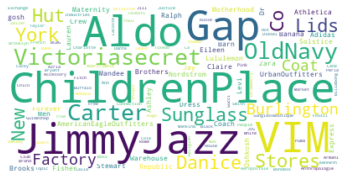

<Figure size 7200x7200 with 0 Axes>

In [24]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

# display the word cloud
plt.imshow(wordcloud_nyc, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(100)
fig.set_figheight(100)

plt.show()

Top 8 brands of NYC:

1. Gap
2. Jimmy Jazz
3. Children Place
4. VIM
5. Old Navy
6. Aldo
7. Victoria Secret
8. Carter


In [59]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

Text(0.5, 1.0, 'Outlets opened in 2019')

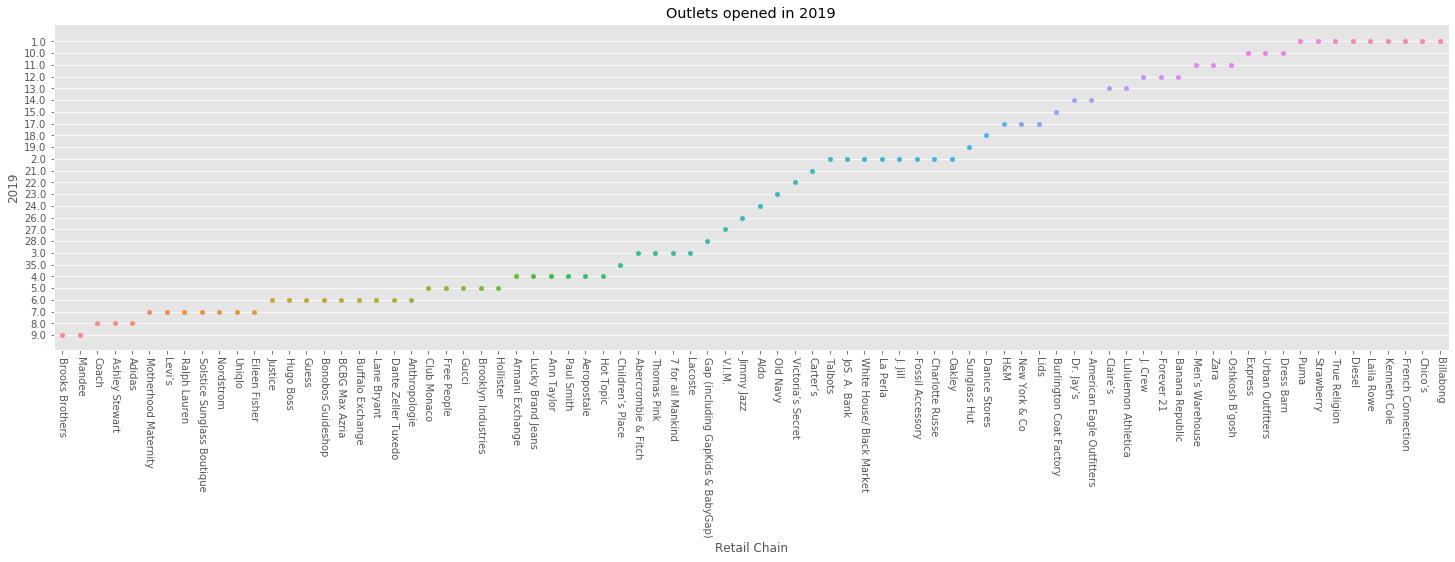

In [95]:
plt.figure(figsize=(25,6))
sns.swarmplot(x='Retail Chain', y=2019, data=df_nyc)
plt.xticks(rotation=-90)
plt.title('Outlets opened in 2019')

# Word Cloud of Brands Borough-wise

#### Lets create a dataframe of brooklyn,Bronx,Queens,Manhattan & Staten Island

## Word Cloud of Brooklyn

In [96]:
df_brooklyn=df_clothing.drop([2019,2018,2017,2016,2015,'Bronx','Queens','Manhattan','Staten Island'], axis=1)



In [97]:
df_brooklyn=df_brooklyn.dropna()
df_brooklyn.head()

,Retail Chain,Brooklyn
39,Children’s Place,9.0
51,Gap (including GapKids & BabyGap),5.0
54,V.I.M.,14.0
56,Jimmy Jazz,9.0
63,Aldo,4.0


In [109]:
df_brooklyn['Brooklyn'].sum()


139.0

In [ ]:
df_brooklyn.to_csv('brooklyn_WC.txt', sep=',', index=False)

In [98]:


brooklyn_wordcloud = open('brooklyn_WC.txt', 'r').read()

wordcloud_brooklyn = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords =stop_word,
)

# generate the word cloud
wordcloud_brooklyn.generate(brooklyn_wordcloud)

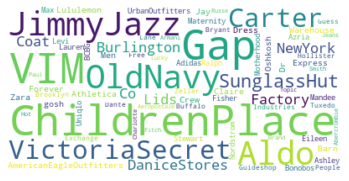

<Figure size 2160x3240 with 0 Axes>

In [99]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

# display the word cloud
plt.imshow(wordcloud_brooklyn, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text xticklabel objects>)

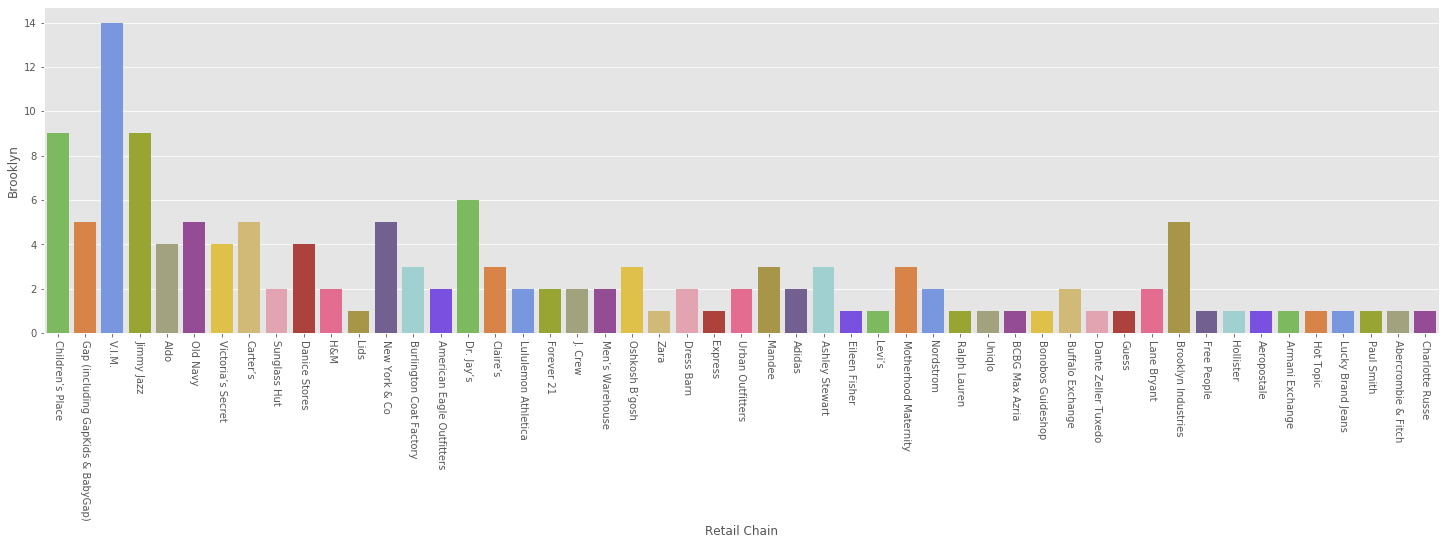

In [106]:
plt.figure(figsize=(25,6))
# Count Plot (a.k.a. Bar Plot)
sns.barplot(x='Retail Chain', y="Brooklyn",data=df_brooklyn,order = df_brooklyn ['Retail Chain'], palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-90)

## Word Cloud of Bronx

In [110]:
df_bronx=df_clothing.drop([2019,2018,2017,2016,2015,'Brooklyn','Queens','Manhattan','Staten Island'], axis=1)
df_bronx=df_bronx.dropna()
df_bronx

,Retail Chain,Bronx
39,Children’s Place,9.0
51,Gap (including GapKids & BabyGap),3.0
54,V.I.M.,6.0
56,Jimmy Jazz,7.0
63,Aldo,1.0
69,Old Navy,3.0
74,Victoria’s Secret,1.0
76,Carter’s,5.0
86,Sunglass Hut,2.0
88,Danice Stores,8.0


In [111]:
df_bronx['Bronx'].sum()

83.0

In [129]:
df_bronx.to_csv('bronx_WC.txt', sep=',', index=False)

In [112]:
bronx_wordcloud = open('bronx_WC.txt', 'r').read()

wordcloud_bronx = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords = stop_word,
)

# generate the word cloud
wordcloud_bronx.generate(bronx_wordcloud)

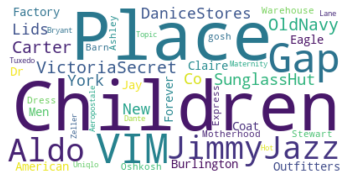

<Figure size 2160x3240 with 0 Axes>

In [113]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

# display the word cloud
plt.imshow(wordcloud_bronx, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

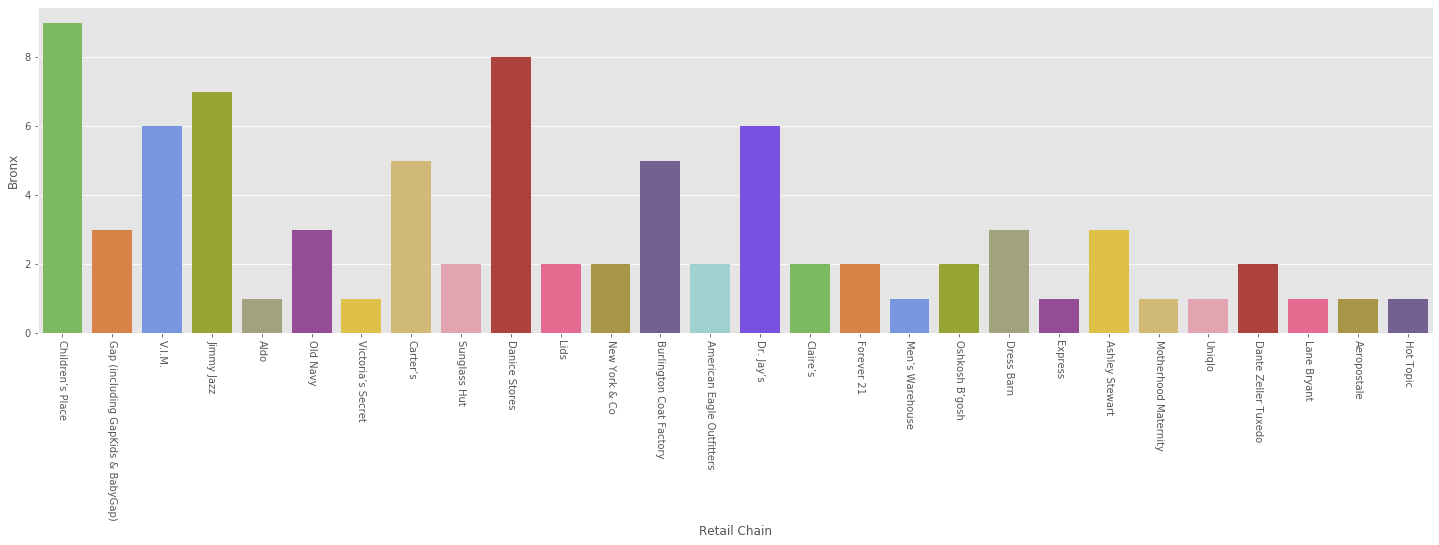

In [114]:
plt.figure(figsize=(25,6))
# Count Plot (a.k.a. Bar Plot)
sns.barplot(x='Retail Chain', y="Bronx",data=df_bronx,order = df_bronx ['Retail Chain'], palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-90)

## Word Cloud of Queens

In [116]:
df_queens=df_clothing.drop([2019,2018,2017,2016,2015,'Brooklyn','Bronx','Manhattan','Staten Island'], axis=1)
df_queens=df_queens.dropna()
df_queens.head()

,Retail Chain,Queens
39,Children’s Place,8.0
51,Gap (including GapKids & BabyGap),5.0
54,V.I.M.,3.0
56,Jimmy Jazz,4.0
63,Aldo,3.0


In [117]:
df_queens['Queens'].sum()

103.0

In [135]:
df_queens.to_csv('queens_WC.txt', sep=',', index=False)

In [118]:

queens_wordcloud = open('queens_WC.txt', 'r').read()


wordcloud_queens = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords = stop_word,
)

# generate the word cloud
wordcloud_queens.generate(queens_wordcloud)

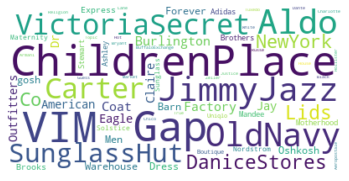

<Figure size 2160x3240 with 0 Axes>

In [119]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

# display the word cloud
plt.imshow(wordcloud_queens, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 <a list of 43 Text xticklabel objects>)

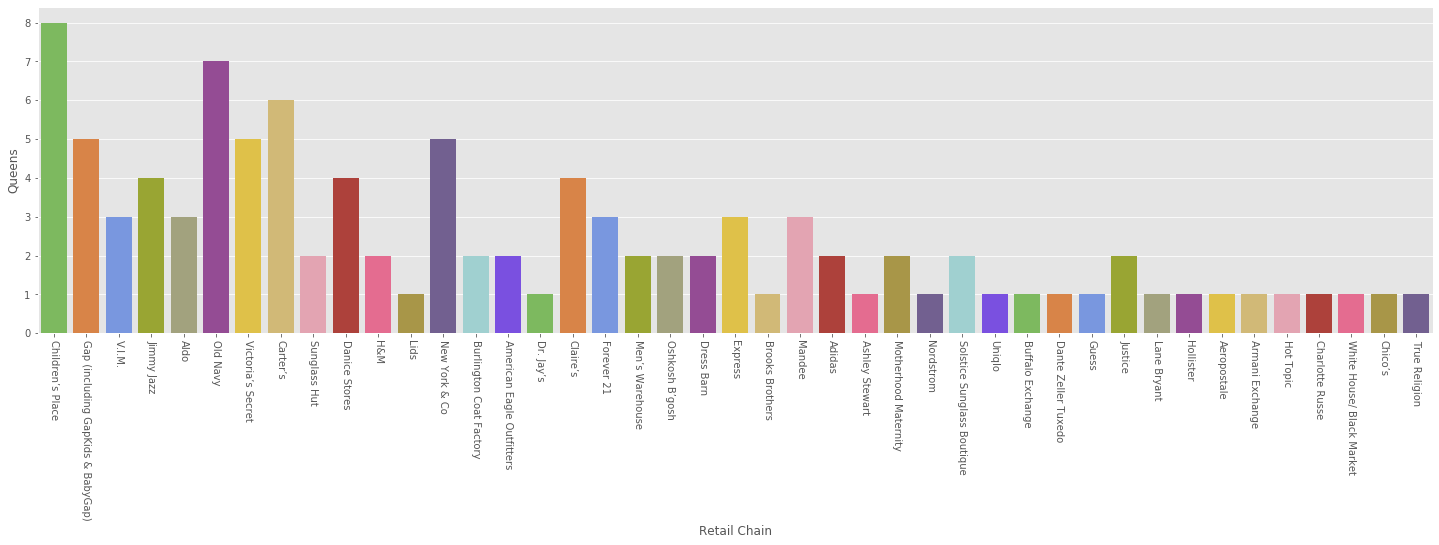

In [120]:
plt.figure(figsize=(25,6))
# Count Plot (a.k.a. Bar Plot)
sns.barplot(x='Retail Chain', y="Queens",data=df_queens,order = df_queens['Retail Chain'], palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-90)


## Wordcloud of Manhattan

In [121]:
df_manhattan=df_clothing.drop([2019,2018,2017,2016,2015,'Brooklyn','Bronx','Queens','Staten Island'], axis=1)
df_manhattan=df_manhattan.dropna()
df_manhattan

,Retail Chain,Manhattan
39,Children’s Place,7.0
51,Gap (including GapKids & BabyGap),13.0
54,V.I.M.,4.0
56,Jimmy Jazz,4.0
63,Aldo,14.0
...,...,...
297,French Connection,1.0
300,Kenneth Cole,1.0
301,Laila Rowe,1.0
305,Puma,1.0


In [123]:
df_manhattan['Manhattan'].sum()

314.0

In [143]:
df_manhattan.to_csv('manhattan_WC.txt', sep=',', index=False)

In [122]:


manhattan_wordcloud = open('manhattan_WC.txt', 'r').read()

wordcloud_manhattan = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords = stop_word,
)

# generate the word cloud
wordcloud_manhattan.generate(manhattan_wordcloud)

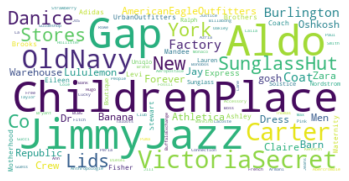

<Figure size 2160x3240 with 0 Axes>

In [124]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

# display the word cloud
plt.imshow(wordcloud_manhattan, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72]),
 <a list of 73 Text xticklabel objects>)

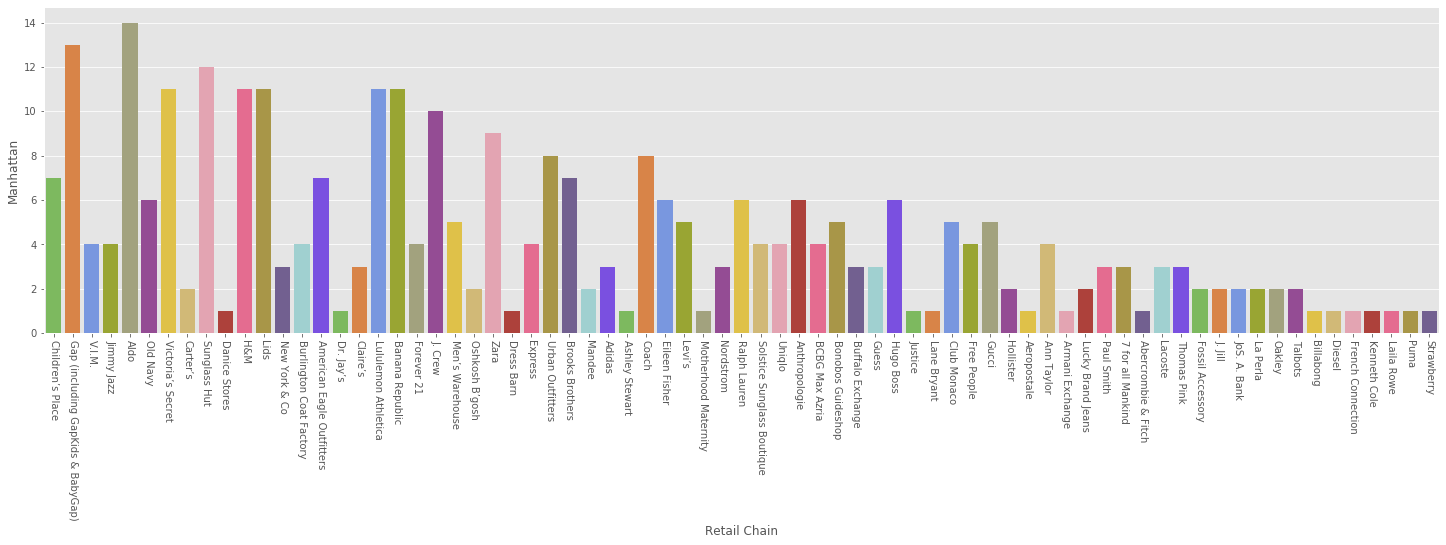

In [125]:
plt.figure(figsize=(25,6))
# Count Plot (a.k.a. Bar Plot)
sns.barplot(x='Retail Chain', y="Manhattan",data=df_manhattan,order = df_manhattan['Retail Chain'], palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-90)


## Word Cloud of Staten Island

In [126]:
df_statenisland=df_clothing.drop([2019,2018,2017,2016,2015,'Brooklyn','Bronx','Queens','Manhattan'], axis=1)
df_statenisland=df_statenisland.dropna()
df_statenisland

,Retail Chain,Staten Island
39,Children’s Place,2.0
51,Gap (including GapKids & BabyGap),2.0
56,Jimmy Jazz,2.0
63,Aldo,2.0
69,Old Navy,2.0
74,Victoria’s Secret,1.0
76,Carter’s,3.0
86,Sunglass Hut,1.0
88,Danice Stores,1.0
95,H&M,2.0


In [128]:
df_statenisland['Staten Island'].sum()

54.0

In [ ]:
df_statenisland.to_csv('statenisland_WC.txt', sep=',', index=False)

In [129]:

statenisland_wordcloud = open('statenisland_WC.txt', 'r').read()

#calling the stop words function here
#stop_words = load_words_from_file('stopwords.txt')


wordcloud_statenisland = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords =stop_word,
    
)

# generate the word cloud
wordcloud_statenisland.generate(statenisland_wordcloud)

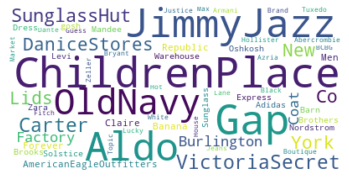

<Figure size 2160x3240 with 0 Axes>

In [130]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

# display the word cloud
plt.imshow(wordcloud_statenisland, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 <a list of 39 Text xticklabel objects>)

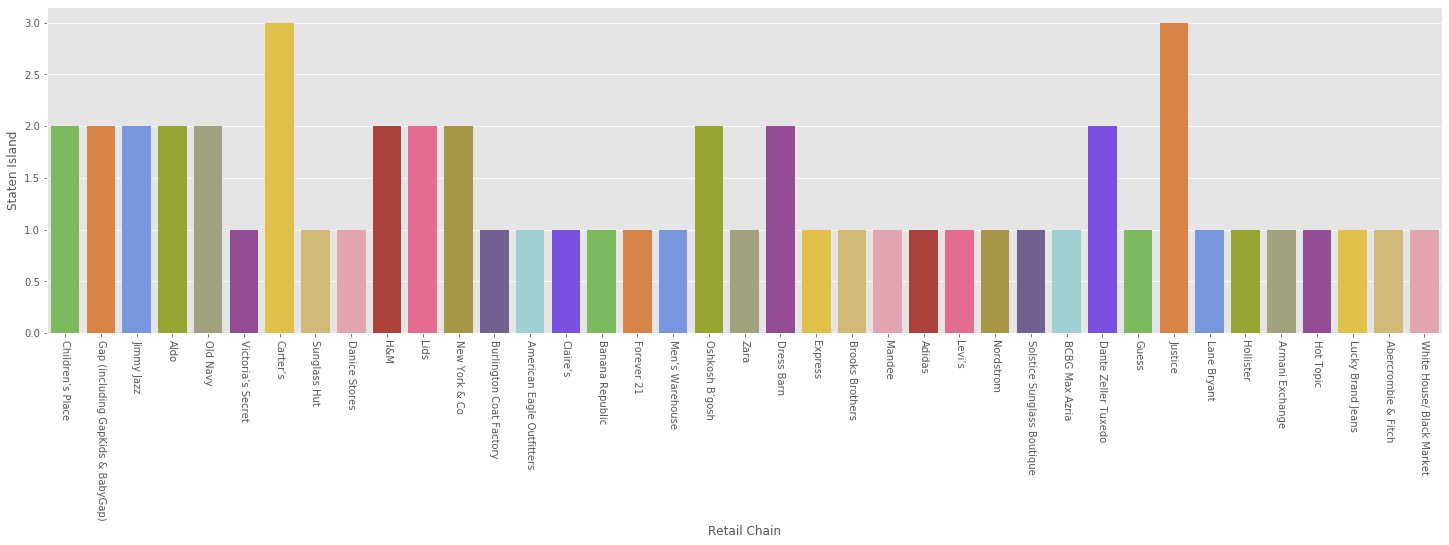

In [131]:
plt.figure(figsize=(25,6))
# Count Plot (a.k.a. Bar Plot)
sns.barplot(x='Retail Chain', y="Staten Island",data=df_statenisland,order = df_statenisland['Retail Chain'], palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-90)